<h2>ALY6015_SpringA2020_Pragati_Koladiya_Assignment_1</h2>

<t><p> <b>Author:</b> Pragati Koladiya </p> </t>
<p> <b>Purpose:</b> Understanding of Data Exploration </p> 
<p> <b>Tittle:</b> Assignment 1 </p>


In [1]:
import matplotlib.pyplot as plt
import matplotlib 
import csv
import datetime
import numpy as np
import pandas as pd
import os, glob
import io
import seaborn as sns
#import xlsxwriter

<h1>Introducing Uber Vs Lyft cab prices dataset</h1>

In [2]:
#weather.csv
data_path = ('https://docs.google.com/spreadsheets/d/e/2PACX-1vTIAqOf1WF2qUcKu9oH8Lf3vk3BbJoXRygHqaz-cmYJTNzXzYyho5D_bzH5OfKOUZEwi3evRGmRoG_A/pub?gid=1030891230&single=true&output=csv')

wdf = pd.read_csv(data_path)
wdf.shape

(6276, 8)

In [3]:
wdf.head(5)

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [4]:
#cab_rides.csv
#Grab cab_rides.csv from Kaggle: https://www.kaggle.com/ravi72munde/uber-lyft-cab-prices
df = pd.read_csv('/Users/pragatikoladiya/OneDrive - Northeastern University/Q2-FIRST/ALY6015_Intermediate_Analytics/uber-lyft-cab-prices/cab_rides.csv')
df.shape

(693071, 10)

In [5]:
df.head(5)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1.543370e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1.543550e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1.543460e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


<h1>
  <b> Dataset Information: </b> 
</h1>
<p> 
  <i>The aim is to predict cab price against weather by using cab and weather dataset
  </i>
</p>
<ul> <h3>Data Sources</h3> 
  <p>The dataset contains real-time data using API queries from Ubers and Lyfts in Boston, MA. It had been collected in the span of about a week in November of 2018</p>
  <li> cab_rides.csv </li>
  <li> weather.csv </li>
</ul>
<ol style="list-style-type:squre;"> <h4> Features Discription of <i><b>cab_rides</b></i> </h4>
  <li>distance - Distance between source and destination</li>
  <li>cab_type - Uber or Lyft </li>
  <li>time_stamp - epoch time when data was quried </li>
  <li>destination - Destination of the ride </li>
  <li>source - Starting point of the ride</li>
  <li>price - Price estimate for the ride in USD($)
      </li>
      <li>surge_multiplier - The multiplier by which price was increased, default is 1
</li>
  <li>id - unique identifier which is primary key for dataset</li>
  <li>product_id - uber/lyft identifier for cab-type</li>
  <li>name - Type of the cab which we can see on app 
  <p>
      <n>For instance,</n>
  </p>
    <n> 
      <i>Uber</i> - UberX, UberXL, UberPlus, Black, Black SUV, UberPool
    </n>
  </p>
  <p>
    <n>
      <i>Lyft </i>- Shared, Pool, UberXL, Lux, Lux Black XL, Lux Black, Lyft XL,  
    </n>
  </p>
  <p>
    <n>
      <i>Others </i> - Taxi, WAV
    </n>
  </p>
</ol>

<ol style="list-style-type:squre;"> <h4> Features Discription of <i><b>weather</b></i> </h4>
  <li>temp - Temprature in fahrenheit(°F)</li>
  <li>location - Location name Mainly cover's Boston area neighborhoods and cities </li>
  <li>clouds - Clouds density define between 0 to 1 </li>
  <li>pressure - Presure is in mb(millibar) and the average pressure at sea level is 1013.25 millibars.</li>
  <li>rain - Rain is in inches for the last hr(hour)</li>
  <li>time_stamp - Epoch time when row data was collected
  </li>
  <li>humidity - Humidity is in %(percentage) 
  </li>
  <li>wind - Wind speed is in mph(miles per hour)  </li>
</ol>




<h1>Perfomed data manipulation</h1>
<n>I have converted the epoch time(time_stamp) into date and time units.</n>

<i>Here, I have taken one timestamp value and coverted into the date and time which is easy to interprit the time stamp value </i>

In [6]:
x = 1545003901
pd.to_datetime(x, unit = 's')

Timestamp('2018-12-16 23:45:01')

<i> For <b>Cab ride</b>, converted the timestamp column to datetime and then dropped the old timestamp column and wrote the values into new df</i>

In [7]:
#converting timestamp to datetime
df['time_stamp_new'] =  pd.to_datetime(df['time_stamp'], unit='ms')
#dropping old time_stamp column
new_df=df.drop(columns=['time_stamp'])

In [8]:
new_df.head(5)

,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,time_stamp_new
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 08:46:40
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 00:53:20
2,0.44,Lyft,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:53:20
3,0.44,Lyft,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 03:53:20
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 02:53:20


<i>Created new csv file to store the updated dataframe </i>

In [9]:
new_df.to_csv('ncab_rides.csv')

<i>For <b>weather</b>,converted the timestamp column to datetime and then dropped the old timestamp column and wrote the values into new df</i>

In [10]:
#converting timestamp to datetime
wdf['time_stamp_new'] =  pd.to_datetime(wdf['time_stamp'], unit='s')
#dropping old time_stamp column
new_wdf=wdf.drop(columns=['time_stamp'])

In [11]:
new_wdf.head(5)

,temp,location,clouds,pressure,rain,humidity,wind,time_stamp_new
0,42.42,Back Bay,1.0,1012.14,0.1228,0.77,11.25,2018-12-16 23:45:01
1,42.43,Beacon Hill,1.0,1012.15,0.1846,0.76,11.32,2018-12-16 23:45:01
2,42.50,Boston University,1.0,1012.15,0.1089,0.76,11.07,2018-12-16 23:45:01
3,42.11,Fenway,1.0,1012.13,0.0969,0.77,11.09,2018-12-16 23:45:01
4,43.13,Financial District,1.0,1012.14,0.1786,0.75,11.49,2018-12-16 23:45:01


<i>Merge two data frames <b>new_df</b> and <b>new_wdf</b></i>

In [12]:
new_df['merge_date'] = new_df.source.astype(str) +" - "+ new_df.time_stamp_new.dt.date.astype("str") +" - "+ new_df.time_stamp_new.dt.hour.astype("str")
wdf['merge_date'] = wdf.location.astype(str) +" - "+ wdf.time_stamp_new.dt.date.astype("str") +" - "+ wdf.time_stamp_new.dt.hour.astype("str")



In [13]:
wdf.index = wdf['merge_date']

In [14]:
new_df.head()

,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,time_stamp_new,merge_date
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 08:46:40,Haymarket Square - 2018-12-16 - 8
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 00:53:20,Haymarket Square - 2018-11-27 - 0
2,0.44,Lyft,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:53:20,Haymarket Square - 2018-11-28 - 1
3,0.44,Lyft,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 03:53:20,Haymarket Square - 2018-11-30 - 3
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 02:53:20,Haymarket Square - 2018-11-29 - 2


In [15]:
merged_df = new_df.join(wdf,on=['merge_date'],rsuffix ='_w')

In [16]:
merged_df['rain'].fillna(0,inplace=True)

In [17]:
merged_df = merged_df[pd.notnull(merged_df['time_stamp_new'])]

In [18]:
merged_df = merged_df[pd.notnull(merged_df['price'])]

In [19]:
merged_df['day'] = merged_df.time_stamp_new.dt.dayofweek

In [20]:
merged_df['hour'] = merged_df.time_stamp_new.dt.hour

In [21]:
merged_df['day'].describe()

count    1.168993e+06
mean     2.373857e+00
std      1.760353e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      6.000000e+00
Name: day, dtype: float64

In [22]:
merged_df.columns

Index(['distance', 'cab_type', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'time_stamp_new',
       'merge_date', 'temp', 'location', 'clouds', 'pressure', 'rain',
       'time_stamp', 'humidity', 'wind', 'time_stamp_new_w', 'merge_date_w',
       'day', 'hour'],
      dtype='object')

In [23]:
merged_df.head(5)

,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,time_stamp_new,...,clouds,pressure,rain,time_stamp,humidity,wind,time_stamp_new_w,merge_date_w,day,hour
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 08:46:40,...,0.39,1022.44,0.0000,1.544950e+09,0.74,8.14,2018-12-16 08:45:01,Haymarket Square - 2018-12-16 - 8,6,8
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 00:53:20,...,1.00,1006.29,0.0425,1.543278e+09,0.90,10.12,2018-11-27 00:17:14,Haymarket Square - 2018-11-27 - 0,1,0
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 00:53:20,...,0.97,1005.94,0.1390,1.543279e+09,0.92,11.22,2018-11-27 00:42:13,Haymarket Square - 2018-11-27 - 0,1,0
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 00:53:20,...,0.98,1006.14,0.2122,1.543280e+09,0.91,9.79,2018-11-27 00:45:21,Haymarket Square - 2018-11-27 - 0,1,0
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 00:53:20,...,0.97,1005.93,0.2318,1.543279e+09,0.92,11.23,2018-11-27 00:42:27,Haymarket Square - 2018-11-27 - 0,1,0


In [24]:
merged_df.count()

distance            1168993
cab_type            1168993
destination         1168993
source              1168993
price               1168993
surge_multiplier    1168993
id                  1168993
product_id          1168993
name                1168993
time_stamp_new      1168993
merge_date          1168993
temp                1163420
location            1163420
clouds              1163420
pressure            1163420
rain                1168993
time_stamp          1163420
humidity            1163420
wind                1163420
time_stamp_new_w    1163420
merge_date_w        1163420
day                 1168993
hour                1168993
dtype: int64

<h1>Explore Features</h1>

In [25]:
new_df['distance'].describe()

count    693071.000000
mean          2.189430
std           1.138937
min           0.020000
25%           1.280000
50%           2.160000
75%           2.920000
max           7.860000
Name: distance, dtype: float64

In [26]:
new_df['distance'].min()
new_df['distance'].max()
new_df['distance'].mean()
new_df['distance'].std()
new_df['distance'].count()

693071

In [27]:
grouped_data = new_df.groupby('cab_type')

In [28]:
grouped_data.describe()

distance                                                    \
             count      mean       std   min   25%   50%   75%   max   
cab_type                                                               
Lyft      307408.0  2.186976  1.086622  0.39  1.27  2.14  2.97  6.33   
Uber      385663.0  2.191386  1.178973  0.02  1.30  2.17  2.84  7.86   

             price             ...             surge_multiplier           \
             count       mean  ...   75%   max            count     mean   
cab_type                       ...                                         
Lyft      307408.0  17.351396  ...  22.5  97.5         307408.0  1.03127   
Uber      330568.0  15.795343  ...  21.5  89.5         385663.0  1.00000   

                                            
              std  min  25%  50%  75%  max  
cab_type                                    
Lyft      0.13561  1.0  1.0  1.0  1.0  3.0  
Uber      0.00000  1.0  1.0  1.0  1.0  1.0  

[2 rows x 24 columns]

In [29]:
#calculated the mean of three features by cab type
grouped_data.mean()

,distance,price,surge_multiplier
cab_type,,,
Lyft,2.186976,17.351396,1.03127
Uber,2.191386,15.795343,1.00000


In [30]:
compare_mean = grouped_data.distance.mean()
compare_mean

cab_type
Lyft    2.186976
Uber    2.191386
Name: distance, dtype: float64

In [31]:
#encoding of categorical data using replace() function
replace_map = {'cab_type': {'Uber': 0, 'Lyft': 1}}
new_df.replace(replace_map, inplace=True)

In [32]:
new_df.to_csv('ncab_rides.csv')

In [33]:
new_df.describe()

,distance,cab_type,price,surge_multiplier
count,693071.000000,693071.000000,637976.000000,693071.000000
mean,2.189430,0.443545,16.545125,1.013870
std,1.138937,0.496803,9.324359,0.091641
min,0.020000,0.000000,2.500000,1.000000
25%,1.280000,0.000000,9.000000,1.000000
50%,2.160000,0.000000,13.500000,1.000000
75%,2.920000,1.000000,22.500000,1.000000
max,7.860000,1.000000,97.500000,3.000000


In [34]:
val=new_df.groupby(new_df['time_stamp_new'].dt.month).agg({'count'})
val['time_stamp_new']


,count
time_stamp_new,
11,287861
12,405210


In [35]:
new_df["distance"].nunique(dropna=True)

549

In [36]:
price_cabtype = new_df[['price','name',]].copy()

In [37]:
price_cabtype.head(10)

,price,name
0,5.0,Shared
1,11.0,Lux
2,7.0,Lyft
3,26.0,Lux Black XL
4,9.0,Lyft XL
5,16.5,Lux Black
6,10.5,Lyft XL
7,16.5,Lux Black
8,3.0,Shared
9,27.5,Lux Black XL


In [38]:
price_cabtype.groupby(by='name').sum()['price'].sort_values(ascending= False).head(25)

name
Black SUV       1668679.50
Lux Black XL    1656124.55
Lux Black       1181605.55
Black           1130758.00
Lux              910509.50
UberXL           863803.00
Lyft XL          784375.20
WAV              538013.50
UberX            537997.00
Lyft             492413.68
UberPool         482184.00
Shared           308929.50
Taxi                  0.00
Name: price, dtype: float64

In [39]:
new_df

,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,time_stamp_new,merge_date
0,0.44,1,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 08:46:40,Haymarket Square - 2018-12-16 - 8
1,0.44,1,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 00:53:20,Haymarket Square - 2018-11-27 - 0
2,0.44,1,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:53:20,Haymarket Square - 2018-11-28 - 1
3,0.44,1,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 03:53:20,Haymarket Square - 2018-11-30 - 3
4,0.44,1,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 02:53:20,Haymarket Square - 2018-11-29 - 2
...,...,...,...,...,...,...,...,...,...,...,...
693066,1.00,0,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-12-02 00:20:00,West End - 2018-12-02 - 0
693067,1.00,0,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018-12-02 00:20:00,West End - 2018-12-02 - 0
693068,1.00,0,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,2018-12-02 00:20:00,West End - 2018-12-02 - 0
693069,1.00,0,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-12-02 00:20:00,West End - 2018-12-02 - 0


In [40]:
cabtype_name = merged_df[['cab_type','name','distance','price']].copy()

In [41]:
cabtype_name.head(5)

,cab_type,name,distance,price
0,Lyft,Shared,0.44,5.0
1,Lyft,Lux,0.44,11.0
1,Lyft,Lux,0.44,11.0
1,Lyft,Lux,0.44,11.0
1,Lyft,Lux,0.44,11.0


<i><b>Qestion 1</b> Which cab is highly used by the users Uber or Lyft?</i>

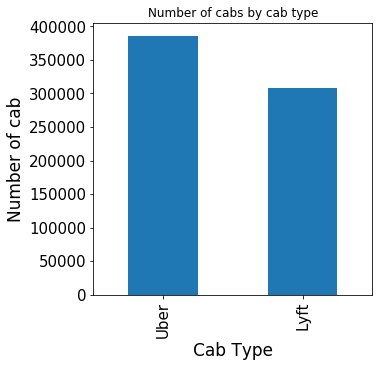

In [42]:
# bar plot
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

ax = df['cab_type'].value_counts().plot(kind='bar',
                                    figsize=(5,5),
                                    title="Number of cabs by cab type" )
ax.set_xlabel("Cab Type", fontsize=17)
ax.set_ylabel("Number of cab", fontsize=17)

plt.show()

=> Uber gets a more rides compared to Lyft in this particular dataset

<i><b>Qestion 2</b> Which cab type is highly used by the users?</i>

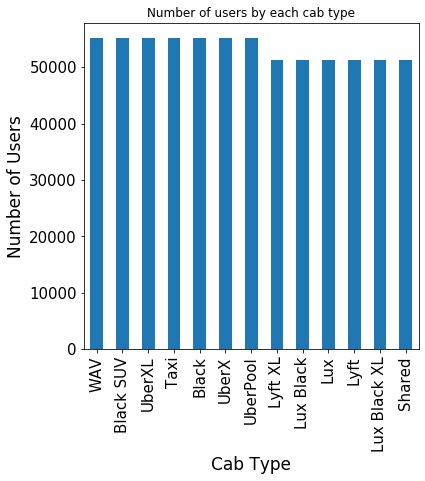

In [43]:
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

ax = new_df['name'].value_counts().plot(kind='bar',
                                    figsize=(6,6),
                                    title="Number of users by each cab type")
ax.set_xlabel("Cab Type",fontsize=17)
ax.set_ylabel("Number of Users", fontsize=17)

plt.show()

=> Uber's cab are used more by users compared to Lyft.

<i><b>Qestion 3</b> Which months has highest demand of cab by users?</i>

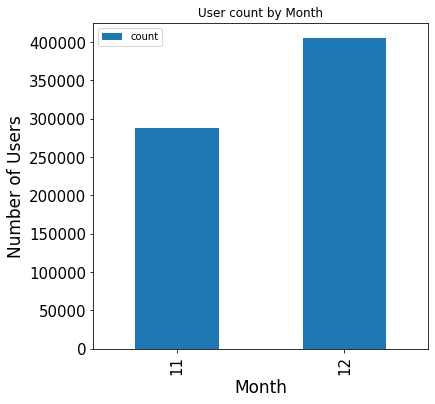

In [44]:
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

ax = val['time_stamp_new'].plot(kind='bar',
                                    figsize=(6,6),
                                    title="User count by Month")
ax.set_xlabel("Month",fontsize=17)
ax.set_ylabel("Number of Users",fontsize=17)
plt.show()

=> Number of users are increased aproximately 30% from November to December. 

<i><b>Qestion 4</b> What is the relation between distance and  months has highest demand of cab by users?</i>

<b>Price Vs Distance: </b>
<i> Before showing a general price vs distance chart, drop 'Taxi' from Uber cabs as they use a different fare structure (in the dataset Taxi fare is always 0 USD) Based on the chart above, it can be observed that Lyft has a lower minimum fare compared to Uber, at the same time Lyft has higher maximum fare. Also, Uber travel distances are generally higher than Lyft.</i>

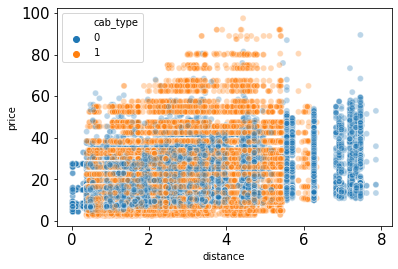

In [45]:
#cab_type : 0 = Uber , 1 = Lyft
Taxi=new_df[new_df.name == 'Taxi'].index
new_df.drop(Taxi , inplace=True)
vis1 = sns.scatterplot(x=new_df.distance, y=new_df.price, data=new_df, hue=new_df.cab_type, alpha=0.3, legend='full')

<i><b>Qestion 3</b> Which cab has highest frequency by distance Uber or Lyft?</i><i>

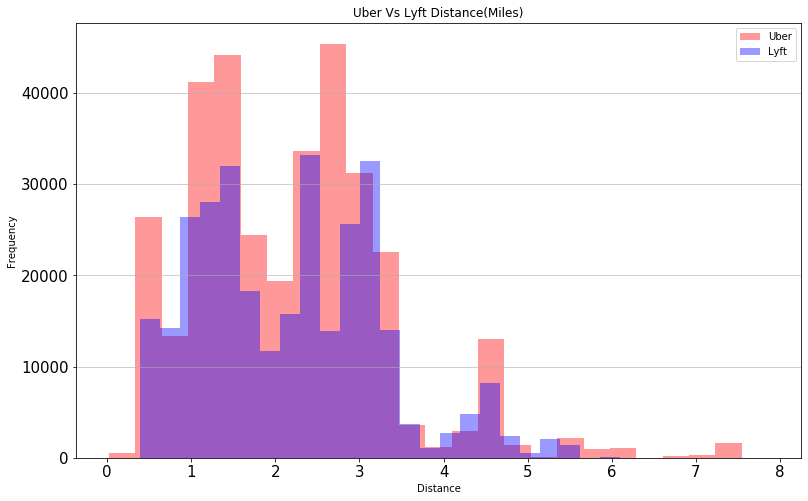

In [46]:
#Histogram 

# Replace string value by numeric: Uber = 0, Lyft = 1
x1 = new_df.loc[new_df.cab_type==0, 'distance']
x2 = new_df.loc[new_df.cab_type==1, 'distance']


kwargs = dict(alpha=0.4, bins=25)
plt.figure(figsize=(13,8))
plt.grid(axis='y', alpha=0.75)
plt.hist(x1, **kwargs, color='r', label='Uber')
plt.hist(x2, **kwargs, color='b', label='Lyft')

plt.gca().set(title='Uber Vs Lyft Distance(Miles)',xlabel='Distance', ylabel='Frequency')

plt.legend();

<i>Corelation between Distance,Cab type, Price and Surge multiplier</i>

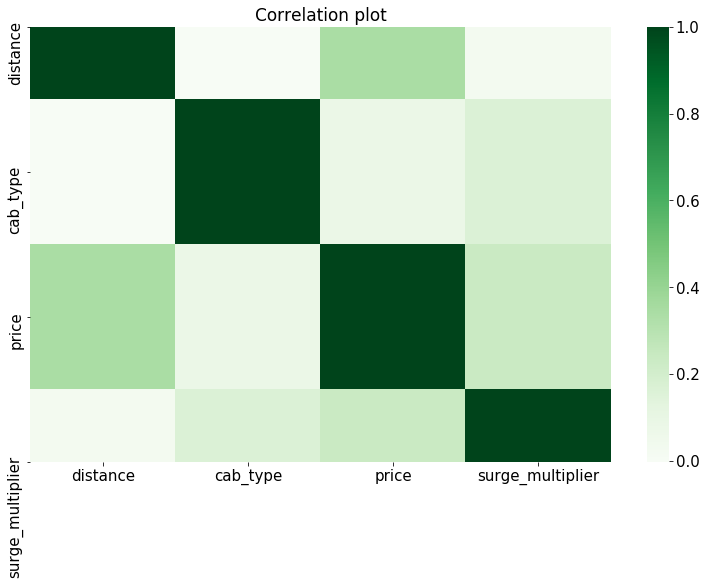

In [47]:
#head map
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
plt.figure(figsize=(13,8))
sns.heatmap(new_df.corr(), cmap='Greens')

plt.title('Correlation plot',fontsize=17)
# plt.figsize=(3,3)
plt.show()

<i>Corelation between wind and humidity</i>

Text(0.5, 1.0, 'Wind Vs Humidity')

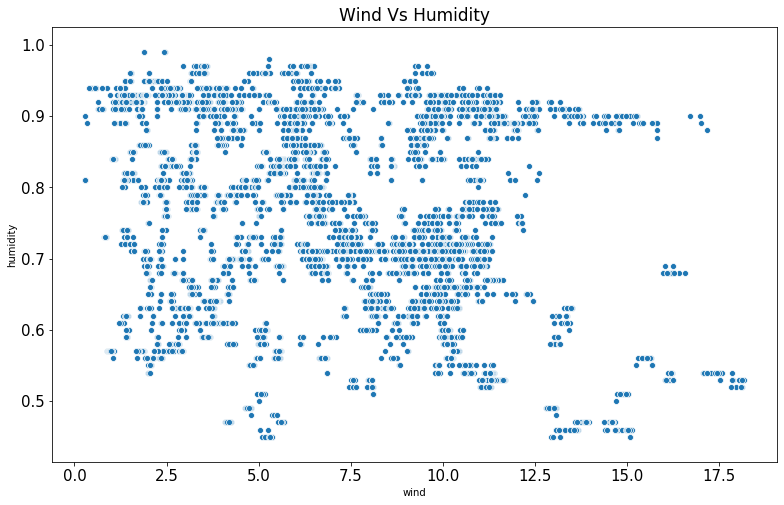

In [48]:
#scatter plot

matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
plt.figure(figsize=(13,8))

sns.scatterplot(x='wind', y='humidity', data=wdf );
plt.title('Wind Vs Humidity',fontsize=17)


<i>Implemented pairplot to observe the corelation between each column.</i>

/Users/pragatikoladiya/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/pragatikoladiya/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


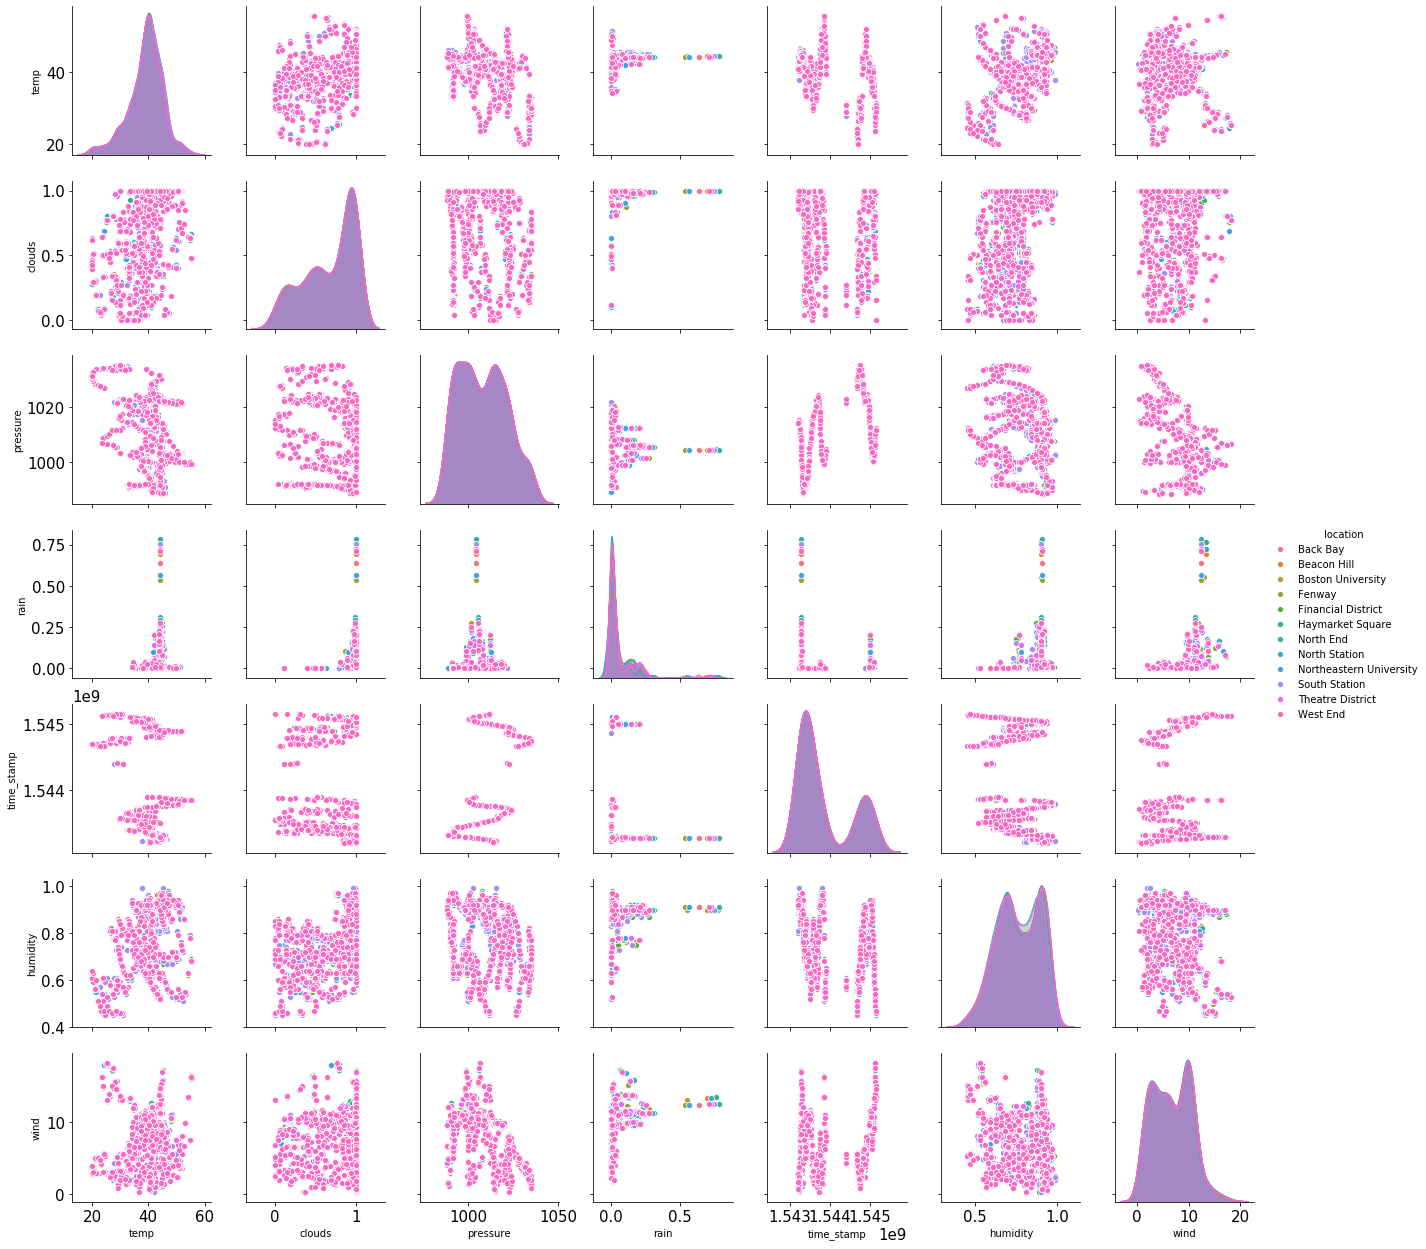

In [49]:
sns.pairplot(data=wdf, hue="location");

<h1>Implementing Linear Regression</h1>
<ul>
    <li>Linear regression calculates an equation that minimizes the distance between the fitted line and all of the data points.</li>
    <li>R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.</li>
</ul>

<i>Importing Libraries to implement linear regressiom  </i>

In [50]:
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
%matplotlib inline

<p><i>Here,I have used two variables to find the liner relationship between Distance and Price.</i></p>
<p><i>I want to predict the price depending upon the distance recorded.</i></p>

In [51]:
X = merged_df['distance'].values.reshape(-1,1)
y = merged_df['price'].values.reshape(-1,1)

<i>Next, I have split 80% of the data to the training set while 20% of the data to test set using below code.</i>

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<p><i>After splitting the data into training and testing sets, finally, the time is to train our algorithm.</i> </p>
    <p><i>For that, I need to import LinearRegression class, instantiate it, and call the fit() method along with our training data.</i></p>

In [53]:
#Training the algorithm
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<n><p><i>The linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data.</i></p></n> 
<p><i>To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset, execute the following code.</i></p>

In [54]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[10.33117244]
[[2.83848536]]



=><b>Intercept</b> = 10.3, <b>Slope</b> = 2.8 

<ul>
<li><i>I will use our test data and see how accurately our algorithm predicts the percentage.</i></li> 
<li><i>To make predictions on the test data, I have executed the following script:</i></li>
</ul>

In [55]:
y_pred = regressor.predict(X_test)

<i>Now compare the actual output values for X_test with the predicted values</i>

In [56]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,26.0,11.892339
1,11.0,18.278931
2,11.0,17.654465
3,13.5,13.680585
4,11.0,17.115152
...,...,...
233794,27.5,17.228692
233795,16.5,16.377146
233796,22.5,15.383676
233797,9.0,17.115152


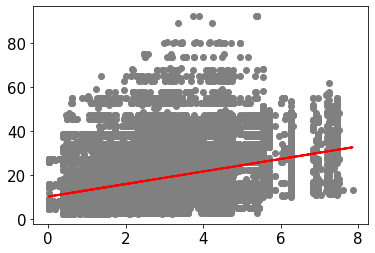

In [57]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

=> The straight line in the above graph shows algorithm is correct.

<b>R-squared is always between 0 and 100%:</b>
<ul>
    <li>0% indicates that the model explains none of the variability of the response data around its mean.</li>
    <li>100% indicates that the model explains all the variability of the response data around its mean.</li>
</ul>

In [58]:
r2_score(df['Actual'], df['Predicted'])

0.11863417047064251

=> R-square = 12% 

<h3><b>Conclusion: </b></h3>

<p>By observing the cab and weather data, it is apprent that Uber has more users compare to Lyft. The groth in rides are also increased during last two months of year 2018.</p>
<p>In general, the higher the R-squared, the better the model fits your data. However, there are important conditions for this guideline that I’ll talk about both in this post and my next post.
</p>